### Regularization techniques using Python

#### Problem Statement

Given the dataset of student scores, predict Physics Score based on Math and Statistics Scores

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm

#### Dataset

The dataset contains scores of various students
- **math**: student score in Maths
- **statistics**: student score in Statistics
- **physics**: student score in Physics

In [3]:
data = pd.read_csv('student.csv')
data.head()

,Math,Statistics,Physics
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
# Storing dataframe values as variables

math = data['Math'].values
stats = data['Statistics'].values
physics = data['Physics'].values

#### Plotting actual values in 3D scatter plot

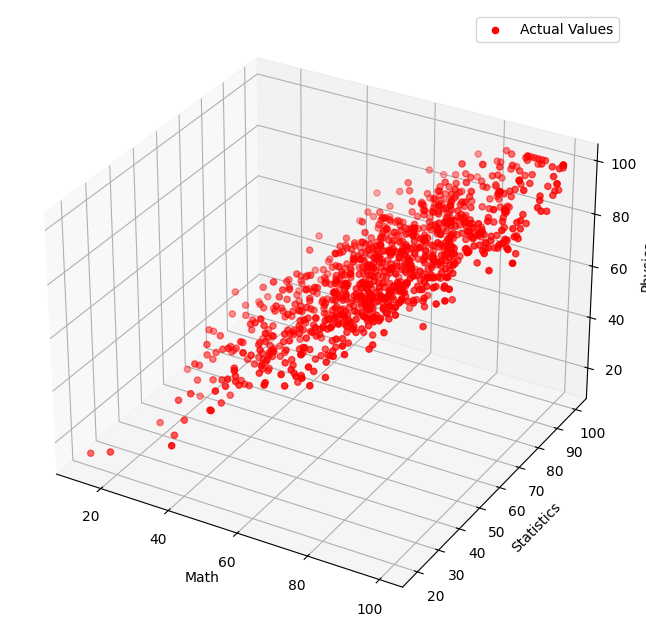

In [6]:
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(math, stats, physics, color='r', label='Actual Values')
ax.set_xlabel('Math')
ax.set_ylabel('Statistics')
ax.set_zlabel('Physics')
ax.legend()
plt.show()

In [7]:
# Restructuring the Dataframe
x = data[['Math','Statistics']].values
y = data['Physics'].values

#### Splitting and Training the model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Fitting the model

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Print R-Squared value

In [10]:
regressor.score(X_test, y_test)

0.9052409628220129

#### Print co-efficient and Intercept

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[0.09356445 0.91854045]
-1.9502732952918507


#### Finding Actual and Predicted values

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,67,62.824441
1,58,59.524537
2,77,76.993909
3,66,66.668627
4,38,37.521818


#### Plotting actual vs predicted values

AttributeError: 'Axes3D' object has no attribute 'legent'

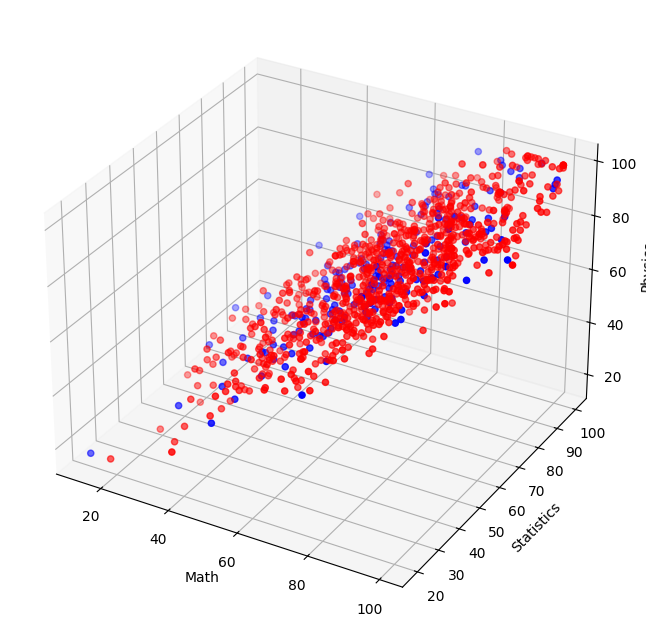

In [14]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Actual Values')
ax.scatter(X_test[:,0], X_test[:,1], y_pred, color='b', label='Predicted Values')
ax.set_xlabel('Math')
ax.set_ylabel('Statistics')
ax.set_zlabel('Physics')
ax.legent()
plt.show()

#### Building model using Statsmodel

In [15]:
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5034.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:07:04   Log-Likelihood:                -2939.1
No. Observations:                1000   AIC:                             5884.
Df Residuals:                     997   BIC:                             5899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4624      0.722     -2.026      0.0

### Regularizing the model using Ridge Regression

In [16]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
pred_train_rr = rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr = rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

4.613807965430802
0.91080604638622
4.414674762854146
0.9052409670566204


### Regularizing the model using Lasso Regression

In [17]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred_train_lasso = lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4.613808167984843
0.9108060385546863
4.414580863103989
0.9052449980466108


### Regularizing the model using Elastic net

In [18]:
elastic = ElasticNet(alpha=0.01)
elastic.fit(X_train, y_train)

pred_train_elastic = elastic.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train_elastic)))
print(r2_score(y_train, pred_train_elastic))

pred_test_elastic = elastic.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test_elastic)))
print(r2_score(y_test, pred_test_elastic))

4.613808162550541
0.9108060387647978
4.414583736900639
0.9052448746796575
